In [ ]:
#code to make pairwise rmsd heatmaps for the centroids nicely

In [2]:
import mdtraj as md
import glob
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mplt
from mpl_toolkits.axes_grid1 import make_axes_locatable

font = {'family' : 'sans-serif',
        'sans-serif': 'Arial'}

mplt.rc('font', **font)

In [3]:
#definitions

binding_atoms = [1024, 1027, 306, 1029, 1031, 1033, 2851, 1035, 1036, 1037, 1038, 1039, 1034, 1040, 1042, 1043, 1044, 1045, 1041, 2854, 1049, 2076,
                 311, 1060, 1061, 1062, 1072, 1074, 1076, 1087, 2112, 2116, 2120, 2122, 2123, 2126, 2135, 323, 2138, 324, 325, 1133, 1134, 1135, 1136,
                 1137, 2170, 330, 3206, 3207, 3208, 3210, 3323, 334, 3219, 336, 2207, 2209, 2210, 2211, 2213, 2214, 2215, 2217, 2219, 2220, 2221, 3244, 
                 1715, 1716, 1743, 1745, 1747, 1749, 2897, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 2837, 328, 329, 2899, 339, 
                 342, 343, 350, 2911, 354, 359, 361, 362, 363, 364, 365, 366, 367, 379, 385, 386, 395, 398, 2449, 2451, 2452, 2453, 2454, 2455, 2456, 
                 2460, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2477, 2478, 941, 2480, 2481, 946, 2834, 944, 2486, 2487, 2488,
                 2835, 2492, 2836, 2494, 963, 2838, 2506, 2507, 2508, 2839, 2510, 972, 978, 979, 980, 2841, 2842, 2844, 997, 2845, 1003, 2846, 1008,
                 1007, 1010, 1009, 2847, 1012, 1013, 1011, 1016, 1017, 1018, 1022]

In [ ]:
# apo + holo pairwise centroid rmsd

In [11]:

apos = md.load('../centroid_rmsd/centroids/all_APO_cens.pdb')
holos = md.load('../centroid_rmsd/centroids/all_holo_cens.pdb')
both = apos.join(holos,check_topology=False)
print(apos)
print(holos)
print(both)

<mdtraj.Trajectory with 61 frames, 3324 atoms, 220 residues, and unitcells>
<mdtraj.Trajectory with 61 frames, 3324 atoms, 220 residues, and unitcells>
<mdtraj.Trajectory with 122 frames, 3324 atoms, 220 residues, and unitcells>


In [11]:
print(apos.n_atoms)
print(holos.n_atoms)

3324
3324


In [17]:
#getting a pairwise rmsd matrix 

distances = np.empty((both.n_frames, both.n_frames))
for i in range(both.n_frames):
    distances[i] = md.rmsd(both, both, frame = i, atom_indices = binding_atoms) * 10
print('Max pairwise rmsd: %f angstroms' % np.max(distances))

flipped = np.flipud(distances) #flipping so that zero axes start at same place

Max pairwise rmsd: 3.438467 angstroms


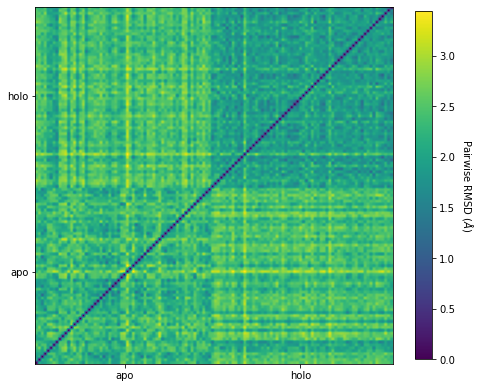

In [21]:
#putting the numpy array data into a pairwise heatmap

fig, ax = plt.subplots(figsize = (8,8))
im = ax.imshow(flipped,cmap = cm.viridis)

labels = ['apo','holo']

ax.set_xticks([30,90])
ax.set_xticklabels(labels, fontsize = 10, family = 'Arial')
#indx = [1,11,21,31,41,51]
#for ind in indx:  
#    ax.axvline(ind, c = 'black', linestyle = '--')
   
ax.set_yticks([30,90])
ax.set_yticklabels(['holo','apo'], fontsize = 10, family = 'Arial')
#for ind in indx:  
#    ax.axhline(ind, c = 'black', linestyle = '--')


cbar = plt.colorbar(im, shrink = 0.8)
cbar.set_label('Pairwise RMSD ('+r'$\AA$'+')', rotation = 270, labelpad = 20, family = 'Arial', fontsize = 10)

plt.savefig('./figures/apo-holo.png', dpi = 300)

In [ ]:
#comparison with the actual cocrystals

In [4]:
#definition of new binding atoms that are present in all cocrystals (check_pdbs_binding.py)

file = '/home/jegan/cocrystals/new_binding_atoms.csv'     
df0 = pd.read_csv(file)
#print(df0['Num'])
new_binding = [1035, 1038, 1040, 1044, 2854, 2116, 323, 1133, 1135, 3208, 2214, 2220, 1715, 3312, 3316, 328, 339, 342, 350, 359, 361, 363, 366, 367, 2452, 2454, 2465, 2469, 2473, 2475, 946, 2487, 2835, 963, 2506, 2839, 2844, 1008, 1009, 1013, 1016]


def select_string(lis):
    s = ''
    for x in lis:
        s += 'index '+str(x)+' or '
    return s[:-4]

def b_ats_coxtal(traj): #binding atom residue indices for cocrystals
    indices = []
    err = []
    for x in range(len(df0['Res'])):
        name = df0['Res'][x]
        num = df0['Num'][x]
        typ = df0['Typ'][x]
        
        target = traj.topology.select('name '+typ+' and resname '+name+' and residue '+str(int(num)-1))
        #target = traj.topology.select('residue')
        if len(target) != 0:
            indices.append(target[0])
        else:
            err.append([name, num-1, typ])
    return indices, err
    

In [121]:
#testing the function

traj = md.load('/home/jegan/cocrystals/pdbs_v5/1npz.pdb')

typ = 'CG'
name = 'PHE'
num = 71

#target = traj.topology.select('name '+typ+' and resname '+name+' and resid '+str(num-2))
#target = traj.atom_slice(traj.topology.select('residue 69 and name CG and resname PHE'))
#target = traj.atom_slice(traj.topology.select('name CG and residue 69')).topology.atom(0)

indices = []
right = []
err = []
for x in range(len(df0['Res'])):
    name = df0['Res'][x]
    num = df0['Num'][x]
    typ = df0['Typ'][x]
        
    target = traj.topology.select('name '+typ+' and resname '+name+' and residue '+str(int(num)-1))
    if len(target) != 0:
        indices.append(target[0])
        right.append([name, num-1, typ])
    else:
        err.append([name, num-1, typ])
print(indices)
print(right)
print(err)

#print('All atoms: %s' % [atom for atom in target.topology.atoms])
#print(target)

[511, 514, 516, 513, 1432, 1059, 152, 561, 563, 1629, 1114, 1113, 863, 1684, 1679, 155, 159, 161, 163, 168, 172, 173, 174, 175, 1238, 1240, 1246, 1247, 1243, 1248, 462, 1250, 1433, 472, 1266, 1435, 1440, 496, 497, 493, 499]
[['PHE', 70, 'CG'], ['PHE', 70, 'CE1'], ['PHE', 70, 'CZ'], ['PHE', 70, 'CD2'], ['TRP', 186, 'O'], ['ALA', 140, 'O'], ['GLN', 19, 'CG'], ['GLN', 76, 'CD'], ['GLN', 76, 'NE2'], ['PHE', 211, 'CB'], ['PHE', 146, 'CE1'], ['PHE', 146, 'CD2'], ['TYR', 113, 'OH'], ['ILE', 217, 'CD1'], ['ILE', 217, 'C'], ['GLN', 19, 'NE2'], ['GLY', 20, 'O'], ['SER', 21, 'CA'], ['SER', 21, 'O'], ['CYS', 22, 'C'], ['GLY', 23, 'N'], ['GLY', 23, 'CA'], ['GLY', 23, 'C'], ['GLY', 23, 'O'], ['ASN', 161, 'CG'], ['ASN', 161, 'ND2'], ['VAL', 162, 'CG1'], ['VAL', 162, 'CG2'], ['VAL', 162, 'C'], ['ASN', 163, 'N'], ['GLY', 62, 'O'], ['ASN', 163, 'C'], ['TRP', 186, 'CB'], ['LYS', 64, 'CA'], ['GLY', 165, 'N'], ['TRP', 186, 'CD1'], ['TRP', 186, 'CZ2'], ['ASN', 67, 'OD1'], ['ASN', 67, 'ND2'], ['ASN', 67, 'O'

In [12]:
#calculating rmsds

coxtals = glob.glob('/home/jegan/cocrystals/pdbs_v5/*.pdb')
distances = np.empty((len(coxtals),122))
print(len(coxtals))
for x in range(len(coxtals)):
    
    cox = md.load(coxtals[x])
    cox_ind = b_ats_coxtal(cox)
    cox_sel = cox.atom_slice(cox.topology.select(select_string(cox_ind[0])))
    
    #print(coxtals[x], cox_sel)
    #print(cox_ind[0])
    #print(cox_ind[1])
    
    for y in range(both.n_frames):
        cen = both[y]
        cen_sel = cen.atom_slice(cen.topology.select(select_string(new_binding)))
        if len(cen_sel) == 0:
            print(y)
       
        distances[x,y] = md.rmsd(cen_sel, cox_sel) * 10 #returning in angstroms
        #print(distances[x,y])

print('Max pairwise rmsd: %f angstroms' % np.max(distances))

51
Max pairwise rmsd: 3.843910 angstroms


In [18]:
print(distances.size)

coxnames = [name.split('/')[5][:4] for name in coxtals]
coxnames.sort()
print(coxnames)
print(len(coxnames))

6222
['1ms6', '1npz', '1nqc', '2f1g', '2fq9', '2fra', '2frq', '2ft2', '2fud', '2fye', '2g6d', '2g7y', '2h7j', '2hh5', '2hxz', '2op3', '2r9m', '2r9n', '2r9o', '3iej', '3n3g', '3n4c', '3ovx', '4p6e', '4p6g', '5qbu', '5qbv', '5qbw', '5qbx', '5qby', '5qbz', '5qc0', '5qc1', '5qc2', '5qc3', '5qc4', '5qc5', '5qc6', '5qc7', '5qc8', '5qc9', '5qca', '5qcb', '5qcc', '5qcd', '5qce', '5qcf', '5qcg', '5qch', '5qci', '5qcj']
51


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


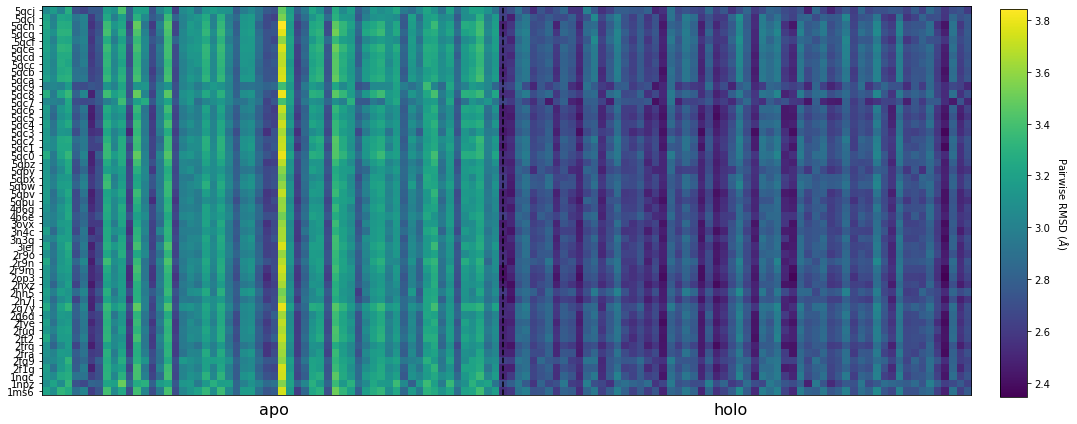

In [72]:
#putting the numpy array data into a pairwise heatmap

fig, ax = plt.subplots(figsize = (6.5,6))
im = ax.imshow(distances,cmap = cm.viridis)

ax.set_xticks([30,90])
ax.set_xticklabels( ['apo','holo'], fontsize = 16, family = 'Arial')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,       )  # ticks along the top edge are off
    #labelbottom=False) # labels along the bottom edge are off

ax.axvline(60, c = 'black', linestyle = '--')

#spacing so I can read the ticks
N = len(coxnames)
data = np.linspace(0, N, N)
plt.yticks(range(N))
#ax.set_yticks(range(0,51))
ax.set_yticklabels(coxnames, fontsize = 10, family = 'Arial')
plt.gca().margins(y=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])+1
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(bottom=margin, top=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

cbaxes = fig.add_axes([0.77, 0.07, 0.015, 0.9]) 
cbar = plt.colorbar(im, cax = cbaxes)
cbar.set_label('Pairwise RMSD ('+r'$\AA$'+')', rotation = 270, labelpad = 20, family = 'Arial', fontsize = 10)
plt.tight_layout()
plt.savefig('./figures/apo-holo-v-coxtal.png', dpi = 300)

In [ ]:
#cocrystals pariwise rmsd

In [21]:

coxtals = glob.glob('/home/jegan/cocrystals/prepared_1/*.pdb')
rmsds = np.empty((len(coxtals),len(coxtals)))

for x in range(len(coxtals)):
    
    ref = md.load(coxtals[x])
    ref_ind = b_ats_coxtal(ref)
    ref_sel = ref.atom_slice(ref.topology.select(select_string(ref_ind[0])))
    
    for y in range(len(coxtals)):
        cox = md.load(coxtals[y])
        cox_ind = b_ats_coxtal(cox)
        cox_sel = cox.atom_slice(cox.topology.select(select_string(cox_ind[0])))
    
        rmsds[x,y] = md.rmsd(cox_sel, ref_sel) * 10
        #print(distances[x,y])
        
print('Max pairwise rmsd: %f angstroms' % np.max(rmsds))

Max pairwise rmsd: 1.622365 angstroms


In [30]:
names = [name.split('/')[5][:4] for name in coxtals]
#coxnames.sort()
print(names)
print(len(names))

['1ms6', '1npz', '1nqc', '2f1g', '2fq9', '2fra', '2frq', '2ft2', '2fud', '2fye', '2g6d', '2g7y', '2h7j', '2hh5', '2hxz', '2op3', '2r9m', '2r9n', '2r9o', '3iej', '3n3g', '3n4c', '3ovx', '4p6e', '4p6g', '5qbu', '5qbv', '5qbw', '5qbx', '5qby', '5qbz', '5qc0', '5qc2', '5qc3', '5qc4', '5qc5', '5qc6', '5qc7', '5qc8', '5qc9', '5qca', '5qcb', '5qcc', '5qcd', '5qce', '5qcf', '5qcg', '5qch', '5qci', '5qcj', '6yyn', '6yyo', '6yyp', '6yyq', '6yyr']
55


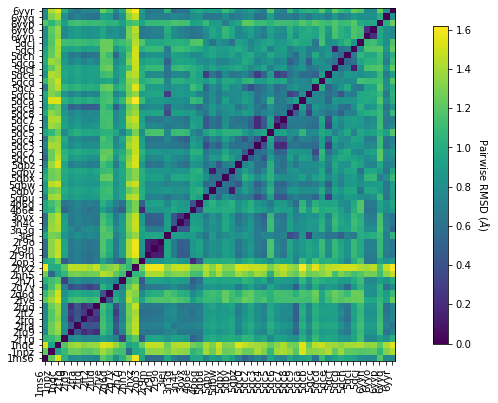

In [65]:
flipped = np.flipud(rmsds) #flipping so that zero axes start at same place

fig, ax = plt.subplots(figsize = (6.5,6.5))
im = ax.imshow(flipped,cmap = cm.viridis)

N = 55
data = np.linspace(0, N, N)
plt.xticks(range(N)) # add loads of ticks
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])+1
m = 0.1 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
ax.set_xticklabels(names, fontsize = 10, family = 'Arial', rotation = 90, ha = 'right')


ax.set_yticks(range(0,55))
rev = [l for l in reversed(names)]
ax.set_yticklabels(rev, fontsize = 10, family = 'Arial')

cbar = plt.colorbar(im, shrink = 0.9)
cbar.set_label('Pairwise RMSD ('+r'$\AA$'+')', rotation = 270, labelpad = 20, family = 'Arial', 
               fontsize = 10)

plt.savefig('./figures/coxtal-v-coxtal.png', dpi = 300)